In [113]:
from transformers import MobileViTFeatureExtractor, MobileViTForSemanticSegmentation
from PIL import Image
import requests
import cv2
import matplotlib.pyplot as plt
from typing import List
import torch

In [3]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [ ]:
feature_extractor = MobileViTFeatureExtractor.from_pretrained("apple/deeplabv3-mobilevit-xx-small")
model = MobileViTForSemanticSegmentation.from_pretrained("apple/deeplabv3-mobilevit-xx-small")

In [97]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
# or outputs.logits.argmax(1)[0]
all_mask = feature_extractor.post_process_semantic_segmentation(outputs, 
                                                                target_sizes=[(image.size[1], image.size[0])])[0]

In [100]:
np.unique(all_mask)

array([ 0,  8, 18])

In [115]:
def bin_mask_from_cls_idx(full_mask: torch.Tensor, cls_idx_list: List[int]) -> torch.Tensor:
    mask = full_mask.clone()
    for i in cls_idx_list:
        mask[mask==i] = 255
    mask[mask!=255] = 0
    return mask

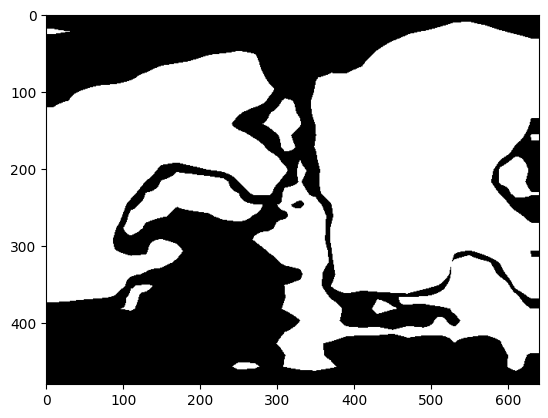

In [122]:
# 0 -> bg, 8 -> cat
selected_mask = bin_mask_from_cls_idx(all_mask, [8, 18])
plt.imshow(selected_mask, cmap='gray')

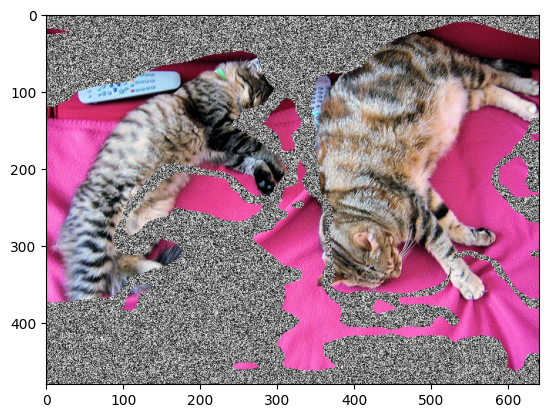

In [123]:
noise = np.random.randint(0, 255, size=(image.size[1], image.size[0], 1), dtype=np.uint8)
plt.imshow(np.where(np.expand_dims(selected_mask, 2), image, noise))